In [1]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
import os 
path = r"C:\Users\Acer\Indian_food_image\Indian_Food_Images\Indian_Food_Images"  
path 

'C:\\Users\\Acer\\Indian_food_image\\Indian_Food_Images\\Indian_Food_Images'

In [19]:
os.listdir (path) 
li = [i for i  in os.listdir (path)]
print (len(li)) 
print (li) 

206
['aam_panna', 'adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_pattice', 'aloo_shimla_mirch', 'aloo_tikki', 'aloo_vadi', 'anarsa', 'appe', 'ariselu', 'baingan_bharta', 'bandar_laddu', 'barfi', 'basundi', 'bebinca', 'beetroot_tikki', 'besan_ladoo', 'bhakarwadi', 'bhapa_doi', 'bhatura', 'bhel_puri', 'bhindi_masala', 'biryani', 'bisi_bele_bath', 'bombay_aloo', 'boondi', 'bread_pakora', 'butter_chicken', 'capsicum_curry', 'chaas', 'chai', 'chakli', 'chak_hao_kheer', 'cham_cham', 'chana_chaat', 'chana_masala', 'chapati', 'chawal', 'cheela', 'cheese_naan', 'chicken_65', 'chicken_chilli', 'chicken_korma', 'chicken_lolipop', 'chicken_razala', 'chicken_seekh_kebab', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'chilli_cheese_toastie', 'chole_bhature', 'chowmein', 'coconut_chutney', 'corn_cheese_balls', 'daal_bhaati_churma', 'daal_puri', 'dabeli', 'dahi_bhalla', 'dahi_chaat', 'dal_makhani', 'dal_rice', 'dal_tadka', 'dharwad_pedha', 'dhokla', 'doodhpak', 'double_ka_meetha', '

In [4]:
import torch 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader


In [5]:
from torchvision import transforms 
transform = transforms.Compose([
    transforms.Resize(256),  # Resize the image to 256x256
    transforms.CenterCrop(224),  # Crop the center 224x224 pixels
      # Apply the custom transform
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the tensor
])


In [6]:
train_dataset = ImageFolder(root = path, transform = transform) 


In [7]:
train_loader = DataLoader (train_dataset, batch_size = 32, shuffle = True) 
train_loader 


In [8]:
batch = iter(train_loader)

In [9]:
batch = next (iter(train_loader)) 

In [10]:
images, labels = batch

In [11]:
images.shape

torch.Size([32, 3, 224, 224])

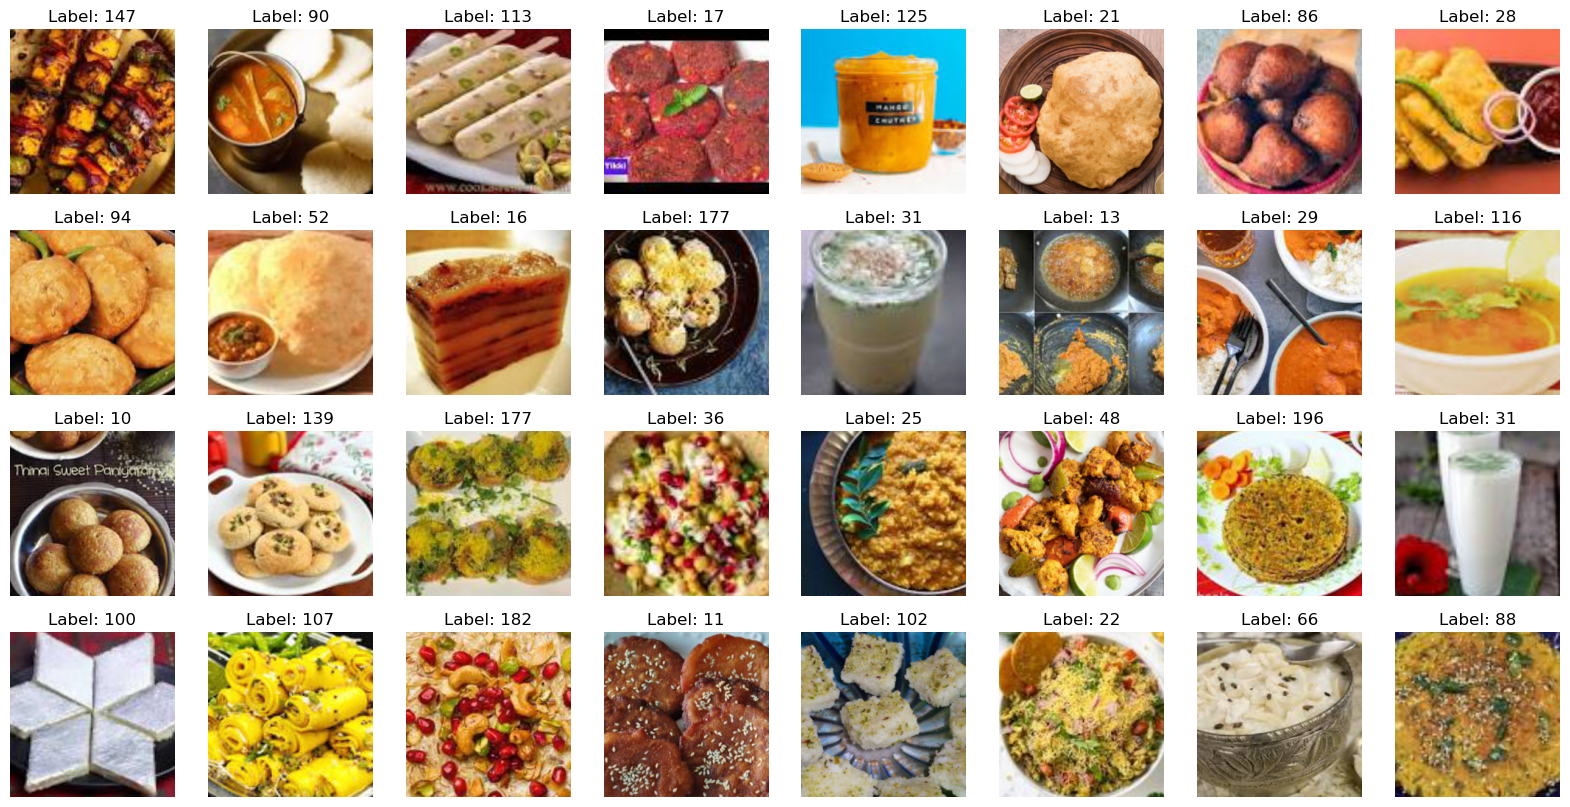

In [12]:
images = images.permute(0,2,3,1) 
import matplotlib.pyplot as plt 
denormalized_images = images * torch.tensor([0.229, 0.224, 0.225]).view(1, 1, 1, 3) + torch.tensor([0.485, 0.456, 0.406]).view(1, 1, 1, 3)
denormalized_images = denormalized_images.clamp(0., 1.)

# Plotting example using matplotlib
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(20, 10))
for i in range(32):
    ax = axes[i // 8][i % 8]
    ax.imshow(denormalized_images[i])
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')

In [13]:
# Check if GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define a custom class
class CustomEfficientNet(nn.Module):
    def __init__(self):
        super(CustomEfficientNet, self).__init__()
        self.model = timm.create_model('efficientnet_b0', pretrained=True)
        self.model.classifier = nn.Linear(self.model.num_features, 206)

    def forward(self, x):
        return self.model(x)

# Instantiate the model and move it to the device (CPU/GPU)
custom_model = CustomEfficientNet().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(custom_model.parameters(), lr=0.001)

# Define dataset transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset (example dataset, adjust path as necessary)
train_dataset = datasets.ImageFolder(root=r"C:\Users\Acer\Indian_food_image\Indian_Food_Images\Indian_Food_Images", transform=transform)
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
for epoch in range(10):
    print(f'Epoch {epoch+1}')
    for i, (inputs, labels) in enumerate(dataloader):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = custom_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(f"Batch {i+1}, Loss: {loss.item()}")
    print(f'Epoch {epoch+1} completed.')


Epoch 1
Batch 1, Loss: 5.331143856048584
Batch 2, Loss: 5.305735111236572
Batch 3, Loss: 5.287989616394043
Batch 4, Loss: 5.2723388671875
Batch 5, Loss: 5.277942657470703
Batch 6, Loss: 5.235893726348877
Batch 7, Loss: 5.2677202224731445
Batch 8, Loss: 5.368079662322998
Batch 9, Loss: 5.506043434143066
Batch 10, Loss: 5.248026371002197
Batch 11, Loss: 5.281380653381348
Batch 12, Loss: 5.228806972503662
Batch 13, Loss: 5.036434650421143
Batch 14, Loss: 5.350888252258301
Batch 15, Loss: 5.105669021606445
Batch 16, Loss: 4.986196041107178
Batch 17, Loss: 5.165818691253662
Batch 18, Loss: 5.068278789520264
Batch 19, Loss: 5.0272064208984375
Batch 20, Loss: 5.0673112869262695
Batch 21, Loss: 4.90919303894043
Batch 22, Loss: 5.043750762939453
Batch 23, Loss: 4.9628424644470215
Batch 24, Loss: 4.9193549156188965
Batch 25, Loss: 4.782953262329102
Batch 26, Loss: 4.902862548828125
Batch 27, Loss: 5.201356887817383
Batch 28, Loss: 5.202244758605957
Batch 29, Loss: 4.904840469360352
Batch 30, Los

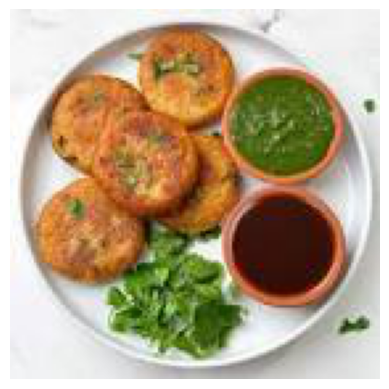

Predicted class: aloo_pattice, Probability: 0.9919


In [24]:
import torch
from PIL import Image


# Load and preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    
    # Define the transformations (adjust based on your model's input size)
  
    
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Perform prediction

# Assuming you have a list of class labels
class_labels = li # Replace with your actual class names

def predict(model, image_path):
    model.eval()  # Set the model to evaluation mode
    image_tensor = preprocess_image(image_path).to(device)  # Move input tensor to same device as model
    
    with torch.no_grad():  # Disable gradient calculation
        output = model(image_tensor)
    
    # Apply softmax to get probabilities
    probabilities = torch.nn.functional.softmax(output, dim=1)

    # Get the predicted class index
    predicted_class_index = torch.argmax(probabilities, dim=1).item()

    # Get the class label
    predicted_class = class_labels[predicted_class_index]

    # Get the probability of the predicted class
    predicted_probability = probabilities[0][predicted_class_index].item()

    return predicted_class, predicted_probability

# Usage
test_path = r"C:\Users\Acer\Indian_food_image\image1.jpg"
predicted_class, predicted_probability = predict(custom_model, test_path)
import matplotlib.pyplot as plt 
from PIL import Image
img = Image.open(test_path) 
plt.imshow (img)
plt.axis("off") 
plt.show() 
print(f"Predicted class: {predicted_class}, Probability: {predicted_probability:.4f}")



In [14]:
# Assuming your model is trained and named 'model'
# Save the entire model
torch.save(custom_model, 'model.pth')

# OR: Save only the model state dictionary (recommended for deployment)
torch.save(custom_model.state_dict(), 'model_weights.pth')


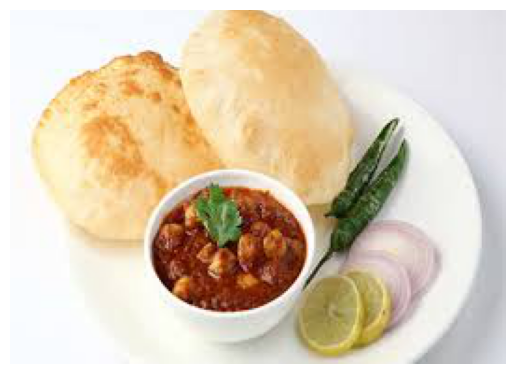

Predicted class: bhatura, Probability: 1.0000


In [27]:
test_path2 = r"C:\Users\Acer\Indian_food_image\Indian_Food_Images\download.jpeg"
predicted_class, predicted_probability = predict(custom_model, test_path2)

img = Image.open(test_path2) 
plt.imshow (img)
plt.axis("off") 
plt.show() 
print(f"Predicted class: {predicted_class}, Probability: {predicted_probability:.4f}")
